In [1]:
import random
import timeit
import time

In [2]:
def create_sequence_of_interest(length_of_seq):
    """
    create a sequence of given length containing integer values, either 0 or 1

    this is intended to represent the outcome of a sequence of coin flips
    """
    list_of_flips=[]
    for this_flip in range(length_of_seq):
        list_of_flips.append(random.randint(0, 1))
    return list_of_flips



In [3]:
# create_sequence_of_interest(10)

In [4]:
def find_match(sequence_of_interest):
    """
    given a sequence of integers (either 1 or 2), flip a coin until that sequence is found
    """
    interested_seq = list(sequence_of_interest)
    seq = []
    while True:
        if len(interested_seq) == 0:
            # print(seq)
            break

        flip_result = random.choice([0,1])
        seq.append(flip_result)

        if interested_seq[0] == flip_result:
            interested_seq.pop(0)
        else:
            interested_seq = list(sequence_of_interest)

    #print("number of coin flips:",number_of_coin_flips)
#     elapsed = timeit.default_timer() - start_time
    #print(str(elapsed) + " seconds")
#     return elapsed, number_of_coin_flips

    return seq
    

In [5]:
number_of_tries_per_loop=1000
start_length=3
end_length=10

In [6]:
list_of_result_dicts=[] 

main_start_time = timeit.default_timer()
for length_of_seq in range(3,10):
    for this_try in range(number_of_tries_per_loop):
        start_time = timeit.default_timer()
        
        sequence_of_interest = create_sequence_of_interest(length_of_seq)
        # print(sequence_of_interest)
        
        seq = find_match(sequence_of_interest)
        
        elapsed = timeit.default_timer() - start_time
        
        number_of_coin_flips = len(seq)
        # print(elapsed,"seconds")
        # print(number_of_coin_flips)
        this_result={}
        this_result['elapsed time in seconds'] = elapsed
        this_result['number of flips'] = number_of_coin_flips
        this_result['sequence length'] = length_of_seq
        list_of_result_dicts.append(this_result)
        
print('elapsed:',time.time()-main_start_time,'seconds')

elapsed: 1634771758.6687207 seconds


In [7]:
import pandas
pandas.__version__

'1.2.4'

In [8]:
results_df = pandas.DataFrame(list_of_result_dicts)
results_df.head(10)

,elapsed time in seconds,number of flips,sequence length
0,0.000041,20,3
1,0.000014,9,3
2,0.000007,3,3
3,0.000012,9,3
4,0.000108,17,3
5,0.000021,19,3
6,0.000009,5,3
7,0.000037,40,3
8,0.000012,9,3
9,0.000020,3,3


In [9]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.3.4'

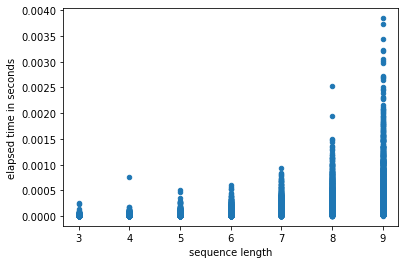

In [10]:
results_df.plot.scatter(x='sequence length',y='elapsed time in seconds')
plt.show()

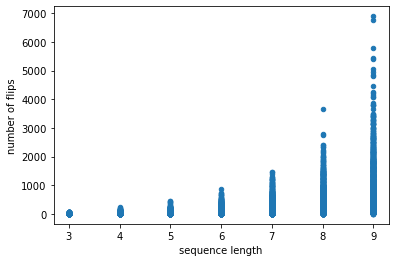

In [11]:
results_df.plot.scatter(x='sequence length',y='number of flips')
plt.show()

In [12]:
results_df.groupby('sequence length').describe()

elapsed time in seconds                                \
                                  count      mean       std       min   
sequence length                                                         
3                                1000.0  0.000015  0.000017  0.000004   
4                                1000.0  0.000023  0.000031  0.000005   
5                                1000.0  0.000041  0.000044  0.000006   
6                                1000.0  0.000079  0.000075  0.000008   
7                                1000.0  0.000150  0.000142  0.000010   
8                                1000.0  0.000288  0.000272  0.000010   
9                                1000.0  0.000575  0.000562  0.000011   

                                                        number of flips  \
                      25%       50%       75%       max           count   
sequence length                                                           
3                0.000007  0.000011  0.000018  0.000253          1000.0   
4                0.000009  0.000015  0.000028  0.000757          1000.0   
5                0.000015  0.000028  0.000049  0.000512          1000.0   
6                0.000028  0.000056  0.000104  0.000609          1000.0   
7                0.000046  0.000106  0.000210  0.000936          1000.0   
8                0.000088  0.000212  0.000398  0.002531          1000.0   
9                0.000167  0.000398  0.000836  0.003844          1000.0   

                                                                          
                    mean         std  min    25%    50%      75%     max  
sequence length                                                           
3                 14.396   11.875951  3.0    6.0   11.0    19.00    82.0  
4                 29.931   29.504623  4.0   10.0   21.0    39.00   257.0  
5                 58.604   58.175644  5.0   19.0   41.0    77.00   464.0  
6                122.697  118.828016  6.0   40.0   85.5   169.00   858.0  
7                253.371  246.824086  7.0   72.0  178.5   360.25  1463.0  
8                500.075  472.495133  8.0  147.5  367.0   706.25  3671.0  
9                992.592  961.625570  9.0  274.0  707.0  1453.75  6892.0

We can add error bars to the plot for each sequence length

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

https://matplotlib.org/gallery/statistics/errorbar_features.html

or use a violin plot

In [ ]:
import seaborn
seaborn.__version__

In [ ]:
ax = seaborn.violinplot(x="sequence length", 
                        y="number of flips", 
                        data=results_df,
                        showmeans=True,
                        showextrema=True,
                        showmedians=True)